# Series temporales y redes complejas

## Grafo de visibilidad

Presentamos una nueva herrramienta de análisis de series temporales. Se trata de una familia de algoritmos que convierten de forma unívoca una serie temporal en un grafo. 

Por construcción, la red extraída por estos métodos hereda o captura propiedades estructurales de la serie de partida. Así, por ejemplo, si la serie temporal es periódica, el grafo asociado es regular, si la serie es aleatoria, la red asociada presenta una distribución de conectividades exponencial, o si la serie es fractal la red correspondiente es libre de escala. Medidas sobre el grafo asociado, como la distribución de conectividades, la distancia media entre nodos y su scaling con el número de nodos/datos, el clustering, las correlaciones de grado-grado o el espectro de su matriz de adyacencia, algunas desarrolladas recientemente en la teoría de redes complejas, permiten caracterizar de forma no trivial la serie temporal.

La eficiencia computacional puede ser superior en ciertos casos a otros métodos clásicos. Además, existen diversas aplicaciones del algoritmo, entre los que se encuentran

- Una nueva herramienta para la estimación de exponentes de Hurst en series fractales.
- Un localizador espacial de bifurcaciones inversas en sistemas dinámicos caóticos.

In [1]:
# https://cbergillos.com/ts2vg/#ts2vg.VisibilityGraphBase.degree_distribution
#!pip install ts2vg

In [2]:
#!pip install networkx

In [3]:
import datetime
import matplotlib.pyplot as plt
import networkx as nx
from ts2vg import NaturalVisibilityGraph

def normalize_date(date):
    return date.strftime("%Y-%m-%d")

ts = [0.87, 0.48, 0.36, 0.83, 0.87, 0.48, 0.36, 0.83]
node_list = list(range(0, len(ts)))
node_names = [normalize_date(datetime.datetime.now() + datetime.timedelta(days=next_day)) for next_day in range(0, len(ts))]
mapping = dict(zip(node_list, node_names))

g = NaturalVisibilityGraph(ts).as_networkx()
g = nx.relabel_nodes(g, mapping)

In [4]:
g.nodes

NodeView(('2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14'))

In [5]:
g.edges

EdgeView([('2021-01-07', '2021-01-08'), ('2021-01-07', '2021-01-09'), ('2021-01-07', '2021-01-10'), ('2021-01-07', '2021-01-11'), ('2021-01-08', '2021-01-10'), ('2021-01-08', '2021-01-09'), ('2021-01-09', '2021-01-10'), ('2021-01-10', '2021-01-11'), ('2021-01-11', '2021-01-12'), ('2021-01-11', '2021-01-13'), ('2021-01-11', '2021-01-14'), ('2021-01-12', '2021-01-14'), ('2021-01-12', '2021-01-13'), ('2021-01-13', '2021-01-14')])

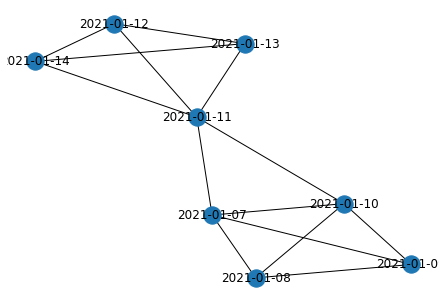

In [6]:
nx.draw(g, with_labels=True)

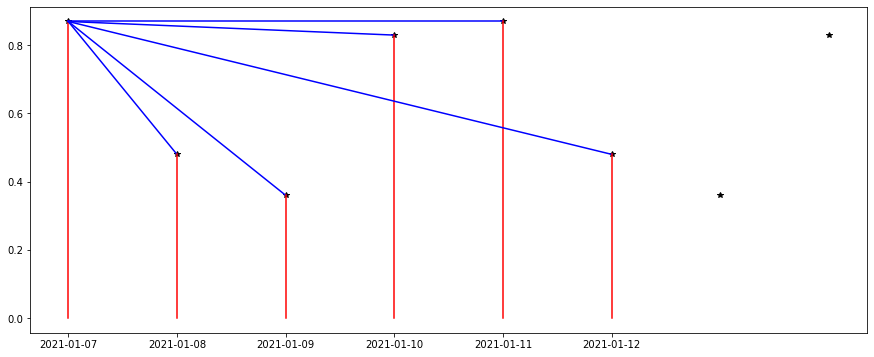

In [7]:
limit = 6
x = [node_names[i] for i in range(0, limit)]
y = ts[0:limit]

plt.figure(figsize=(15, 6))
plt.plot(ts, "k*")
for i in range(0, limit):
    plt.plot([x[0], x[i]], [y[0], y[i]], "b-")
    plt.plot([x[i], x[i]], [0, y[i]],"r-")

In [8]:
from itertools import combinations

def visibility_graph(series):
    g = nx.Graph()   
    # convert list of magnitudes into list of tuples that hold the index
    tseries = []
    n = 0
    for magnitude in series:
        tseries.append( (n, magnitude ) )
        n += 1

    # contiguous time points always have visibility
    for n in range(0, len(tseries)-1):
        (ta, ya) = tseries[n]
        (tb, yb) = tseries[n+1]
        g.add_node(ta, mag=ya)
        g.add_node(tb, mag=yb)
        g.add_edge(ta, tb)

    for a, b in combinations(tseries, 2):
        # two points, maybe connect
        (ta, ya) = a
        (tb, yb) = b
        connect = True      
        # let's see all other points in the series
        for tc, yc in tseries[ta:tb]:
            # other points, not a or b
            if tc != ta and tc != tb:
                # does c obstruct?
                if yc > yb + (ya - yb) * ( (tb - tc) / (tb - ta) ):
                    connect = False                 
        if connect:
            g.add_edge(ta, tb)
    return g

vg = visibility_graph(ts)

In [9]:
vg.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7))

In [10]:
vg.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (4, 6), (4, 7), (5, 6), (5, 7), (6, 7)])

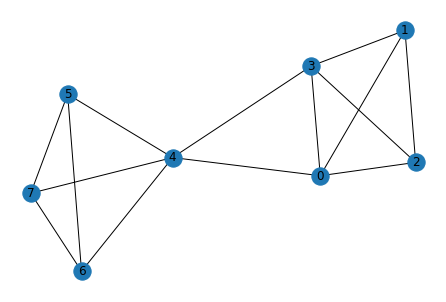

In [11]:
nx.draw(vg, with_labels=True)